In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/machine_hack/aqi/train.csv')
df1 = pd.read_csv('/content/drive/MyDrive/machine_hack/aqi/test.csv')
print(df.shape, df1.shape)

(495512, 15) (212363, 14)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 495512 entries, 0 to 495511
Data columns (total 15 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   City        495512 non-null  object 
 1   Datetime    495512 non-null  object 
 2   PM2.5       488851 non-null  float64
 3   PM10        484693 non-null  float64
 4   NO          469994 non-null  float64
 5   NO2         489898 non-null  float64
 6   NOx         485090 non-null  float64
 7   NH3         474977 non-null  float64
 8   CO          490495 non-null  float64
 9   SO2         483354 non-null  float64
 10  O3          471898 non-null  float64
 11  Benzene     486993 non-null  float64
 12  Toluene     484508 non-null  float64
 13  Xylene      483352 non-null  float64
 14  AQI_Bucket  495512 non-null  int64  
dtypes: float64(12), int64(1), object(2)
memory usage: 56.7+ MB


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212363 entries, 0 to 212362
Data columns (total 14 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   City      212363 non-null  object 
 1   Datetime  212363 non-null  object 
 2   PM2.5     209397 non-null  float64
 3   PM10      207609 non-null  float64
 4   NO        201426 non-null  float64
 5   NO2       209837 non-null  float64
 6   NOx       207920 non-null  float64
 7   NH3       203522 non-null  float64
 8   CO        210302 non-null  float64
 9   SO2       207179 non-null  float64
 10  O3        202353 non-null  float64
 11  Benzene   208778 non-null  float64
 12  Toluene   207723 non-null  float64
 13  Xylene    207181 non-null  float64
dtypes: float64(12), object(2)
memory usage: 22.7+ MB


In [ ]:
df.duplicated().any()

False

In [ ]:
df.isnull().sum()

City              0
Datetime          0
PM2.5          6661
PM10          10819
NO            25518
NO2            5614
NOx           10422
NH3           20535
CO             5017
SO2           12158
O3            23614
Benzene        8519
Toluene       11004
Xylene        12160
AQI_Bucket        0
dtype: int64

In [ ]:
df.nunique()

City             26
Datetime      48191
PM2.5          5486
PM10           6926
NO             3347
NO2            2742
NOx            3624
NH3            2787
CO             1671
SO2            1958
O3             2092
Benzene        1333
Toluene        1946
Xylene          895
AQI_Bucket        7
dtype: int64

In [ ]:
df1.isnull().sum()

City            0
Datetime        0
PM2.5        2966
PM10         4754
NO          10937
NO2          2526
NOx          4443
NH3          8841
CO           2061
SO2          5184
O3          10010
Benzene      3585
Toluene      4640
Xylene       5182
dtype: int64

In [ ]:
df.Datetime = pd.to_datetime(df.Datetime)
df1.Datetime = pd.to_datetime(df1.Datetime)

In [ ]:
df['train']=1
df1['train']=0

In [ ]:
df['index'] = df.index
df1['index'] = df1.index

In [ ]:
df_agg = pd.concat([df,df1],axis=0)
print(df_agg.shape)

(707875, 17)


In [ ]:
df_agg_delhi = df_agg[df_agg.City=='Delhi']
df_agg_delhi = df_agg_delhi.sort_values(['Datetime'])
df_agg_delhi = df_agg_delhi.fillna(method='ffill')

In [ ]:
DF = df_agg_delhi
cities = [x for x in df_agg.City.unique() if x not in ['Delhi']]
from tqdm import tqdm
for city in tqdm(cities):
    df_agg_city = df_agg[df_agg.City==city]
    df_agg_city = df_agg_city.sort_values(['Datetime'])
    df_agg_city = df_agg_city.fillna(method='ffill')
    df_agg_city = df_agg_city.fillna(method='bfill')
    DF = pd.concat([DF,df_agg_city],axis=0)

100%|██████████| 25/25 [00:05<00:00,  4.79it/s]


In [ ]:
DF = DF.reset_index().drop(['level_0'],axis=1)

In [ ]:
DF.isnull().sum()

City          0
Datetime      0
PM2.5         0
PM10          0
NO            0
NO2           0
NOx           0
NH3           0
CO            0
SO2           0
O3            0
Benzene       0
Toluene       0
Xylene        0
AQI_Bucket    0
train         0
index         0
dtype: int64

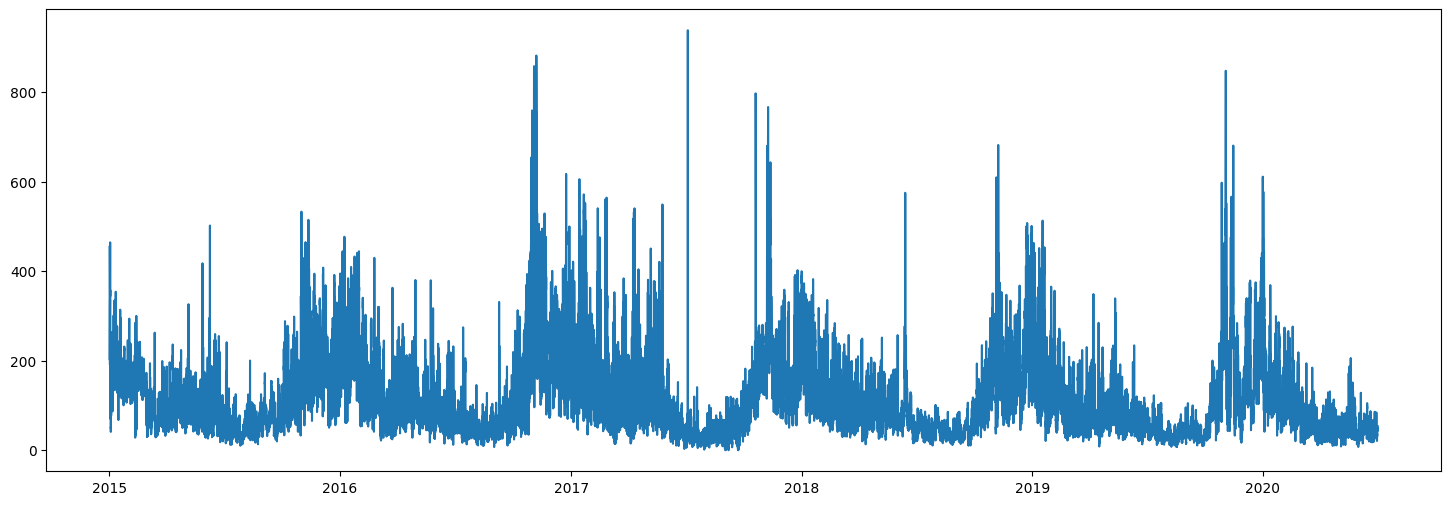

In [ ]:
plt.figure(figsize=(18,6))
plt.plot(DF[DF.City=='Delhi']['Datetime'],DF[DF.City=='Delhi']['PM2.5'])
plt.show()

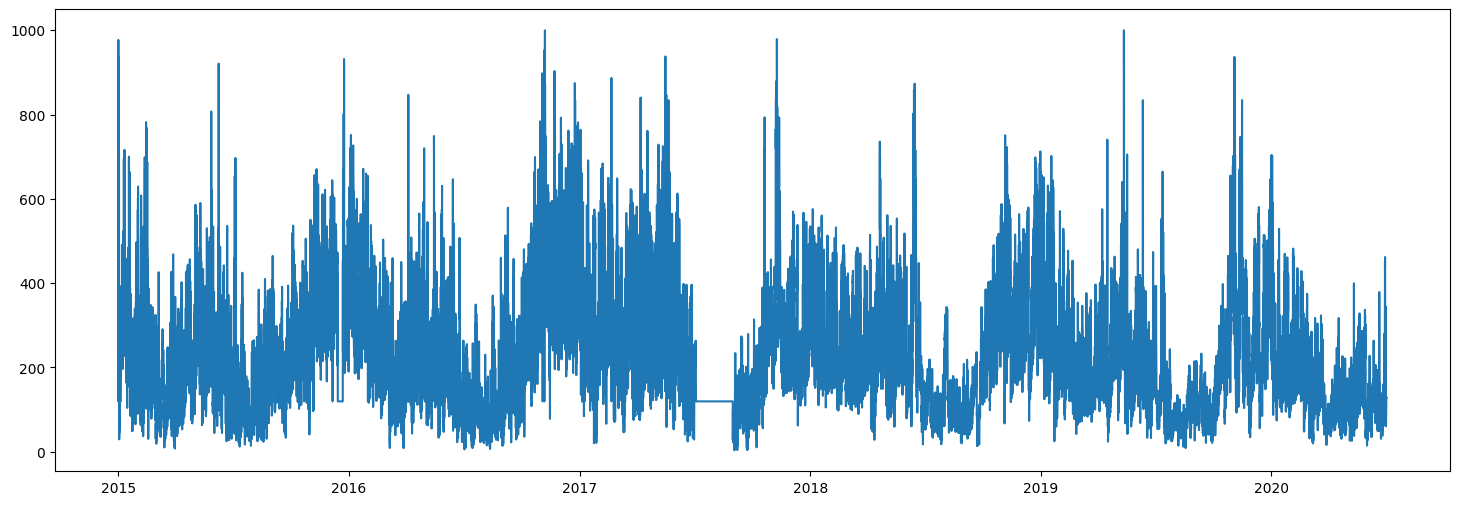

In [ ]:
plt.figure(figsize=(18,6))
plt.plot(DF[DF.City=='Delhi']['Datetime'],DF[DF.City=='Delhi']['PM10'])
plt.show()

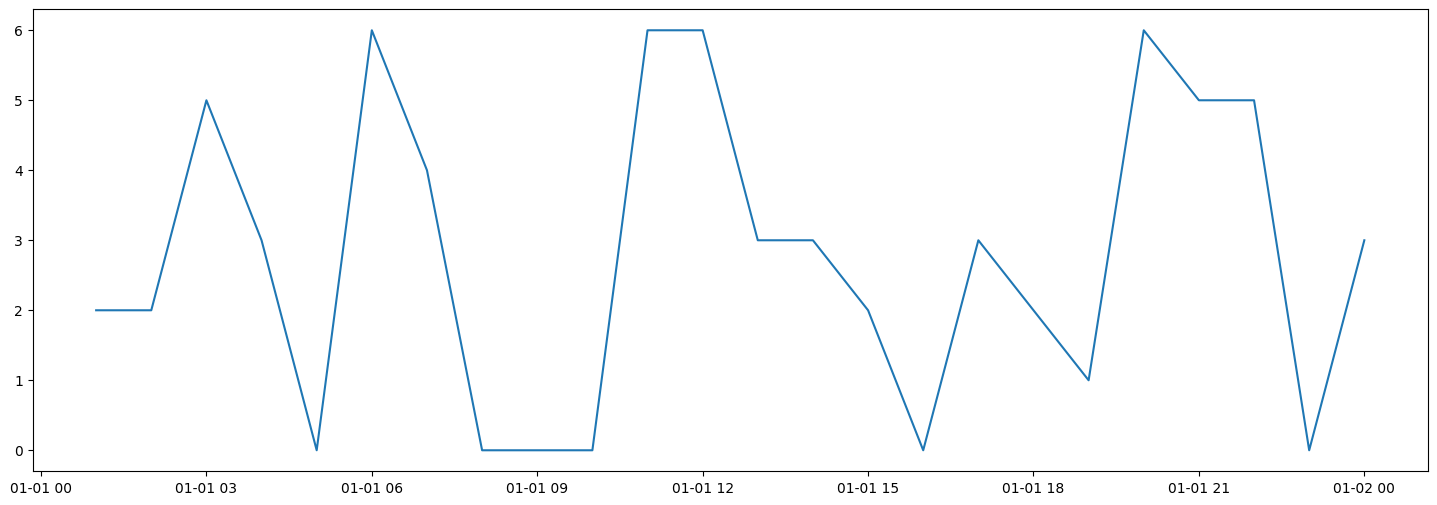

In [ ]:
plt.figure(figsize=(18,6))
plt.plot(DF[DF.City=='Delhi']['Datetime'][:24],DF[DF.City=='Delhi']['AQI_Bucket'][:24])
plt.show()

In [ ]:
DF

,City,Datetime,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI_Bucket,train,index
0,Delhi,2015-01-01 01:00:00,454.6,935.2,81.5,41.8,187.7,27.5,9.3,3.4,54.9,25.2,58.6,13.8,2.0,1,311301
1,Delhi,2015-01-01 02:00:00,440.4,119.1,70.8,43.5,176.8,27.7,13.3,3.9,50.5,23.1,49.4,15.6,2.0,0,200618
2,Delhi,2015-01-01 03:00:00,409.1,119.1,132.5,41.2,141.0,28.9,29.7,2.8,19.3,19.0,38.9,17.2,5.0,1,100152
3,Delhi,2015-01-01 04:00:00,436.1,119.1,84.8,39.6,102.8,29.3,21.8,2.8,20.1,14.0,27.5,16.8,3.0,1,63324
4,Delhi,2015-01-01 05:00:00,415.9,977.0,60.2,37.4,80.1,30.8,26.2,6.2,16.0,11.1,22.0,14.3,0.0,1,396852
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
707870,Ernakulam,2020-06-30 20:00:00,12.0,39.1,3.5,2.4,2.2,2.6,2.7,2.7,34.8,0.0,0.0,0.0,1.0,1,165758
707871,Ernakulam,2020-06-30 21:00:00,13.1,43.4,2.8,2.4,1.7,1.6,2.8,2.7,34.8,0.0,0.0,0.0,5.0,1,406827
707872,Ernakulam,2020-06-30 22:00:00,17.0,54.8,2.6,2.4,1.6,1.4,2.5,2.7,34.8,0.0,0.0,0.0,5.0,0,13064
707873,Ernakulam,2020-06-30 23:00:00,14.8,46.0,2.6,2.4,1.6,1.5,2.2,2.4,34.8,0.0,0.0,0.0,1.0,1,43432


In [ ]:
submission = pd.read_csv('/content/drive/MyDrive/machine_hack/aqi/submission.csv')
submission['AQI_Bucket'] = df1.AQI_Bucket
submission.to_csv('/content/drive/MyDrive/machine_hack/aqi/submission11.csv',index=False)

In [ ]:
"""DF.loc[DF['PM2.5'].isnull(),'PM2.5'] = df[df.City==DF[DF['PM2.5'].isnull()].City.iloc[0]]['PM2.5'].mean()
DF.loc[DF['NO'].isnull(),'NO'] = df[df.City==DF[DF['NO'].isnull()].City.iloc[0]]['NO'].mean()
DF.loc[DF['NH3'].isnull(),'NH3'] = df[df.City==DF[DF['NH3'].isnull()].City.iloc[0]]['NH3'].mean()
DF.loc[DF['O3'].isnull(),'O3'] = df[df.City==DF[DF['O3'].isnull()].City.iloc[0]]['O3'].mean()
DF.loc[DF['Toluene'].isnull(),'Toluene'] = df[df.City==DF[DF['Toluene'].isnull()].City.iloc[0]]['Toluene'].mean()
DF.loc[DF['Xylene'].isnull(),'Xylene'] = df[df.City==DF[DF['Xylene'].isnull()].City.iloc[0]]['Xylene'].mean()"""

"DF.loc[DF['PM2.5'].isnull(),'PM2.5'] = df[df.City==DF[DF['PM2.5'].isnull()].City.iloc[0]]['PM2.5'].mean()\nDF.loc[DF['NO'].isnull(),'NO'] = df[df.City==DF[DF['NO'].isnull()].City.iloc[0]]['NO'].mean()\nDF.loc[DF['NH3'].isnull(),'NH3'] = df[df.City==DF[DF['NH3'].isnull()].City.iloc[0]]['NH3'].mean()\nDF.loc[DF['O3'].isnull(),'O3'] = df[df.City==DF[DF['O3'].isnull()].City.iloc[0]]['O3'].mean()\nDF.loc[DF['Toluene'].isnull(),'Toluene'] = df[df.City==DF[DF['Toluene'].isnull()].City.iloc[0]]['Toluene'].mean()\nDF.loc[DF['Xylene'].isnull(),'Xylene'] = df[df.City==DF[DF['Xylene'].isnull()].City.iloc[0]]['Xylene'].mean()"

In [ ]:
DF['year'] = DF.Datetime.dt.year
DF['month'] = DF.Datetime.dt.month
DF['day'] = DF.Datetime.dt.day
DF['dayofweek'] = DF.Datetime.dt.dayofweek
DF['weekend'] = DF.dayofweek.apply(lambda x: '0' if x<5 else '1')
DF['hour'] = DF.Datetime.dt.hour
DF.year = DF.year.apply(lambda x: x-2015)+1

In [ ]:
DF = DF.drop(['Datetime'],axis=1)

In [ ]:
df = DF[DF.train==1]
df1= DF[DF.train==0]

In [ ]:
df = df.drop(['index','train'],axis=1)
df1 =df1.drop(['index','train'],axis=1)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 495512 entries, 0 to 707874
Data columns (total 20 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   City        495512 non-null  object 
 1   PM2.5       495512 non-null  float64
 2   PM10        495512 non-null  float64
 3   NO          495512 non-null  float64
 4   NO2         495512 non-null  float64
 5   NOx         495512 non-null  float64
 6   NH3         495512 non-null  float64
 7   CO          495512 non-null  float64
 8   SO2         495512 non-null  float64
 9   O3          495512 non-null  float64
 10  Benzene     495512 non-null  float64
 11  Toluene     495512 non-null  float64
 12  Xylene      495512 non-null  float64
 13  AQI_Bucket  495512 non-null  float64
 14  year        495512 non-null  int64  
 15  month       495512 non-null  int64  
 16  day         495512 non-null  int64  
 17  dayofweek   495512 non-null  int64  
 18  weekend     495512 non-null  object 
 19  ho

In [ ]:
df['hour_Cos'] = np.cos(2*np.pi*df['hour']/df['hour'].max())
df['hour_Sin'] = np.sin(2*np.pi*df['hour']/df['hour'].max())
df1['hour_Cos'] = np.cos(2*np.pi*df1['hour']/df1['hour'].max())
df1['hour_Sin'] = np.sin(2*np.pi*df1['hour']/df1['hour'].max())

In [ ]:
df['month_Cos'] = np.cos(2*np.pi*df['month']/df['month'].max())
df['month_Sin'] = np.sin(2*np.pi*df['month']/df['month'].max())
df1['month_Cos'] = np.cos(2*np.pi*df1['month']/df1['month'].max())
df1['month_Sin'] = np.sin(2*np.pi*df1['month']/df1['month'].max())

In [ ]:
df['NO_bins'] = df.NO.apply(lambda x: '0' if x<500 else '1')
df1['NO_bins'] = df1.NO.apply(lambda x: '0' if x<500 else '1')

In [ ]:
df['NO2_bins'] = df.NO2.apply(lambda x: '0' if x<500 else '1')
df1['NO2_bins'] = df1.NO2.apply(lambda x: '0' if x<500 else '1')

In [ ]:
df['NOx_bins'] = df.NOx.apply(lambda x: '0' if x<500 else '1')
df1['NOx_bins'] = df1.NOx.apply(lambda x: '0' if x<500 else '1')

In [ ]:
df['NH3_bins'] = df.NH3.apply(lambda x: '0' if x<500 else '1')
df1['NH3_bins'] = df1.NH3.apply(lambda x: '0' if x<500 else '1')

In [ ]:
df['CO_bins'] = df.CO.apply(lambda x: '0' if x<500 else '1')
df1['CO_bins'] = df1.CO.apply(lambda x: '0' if x<500 else '1')

In [ ]:
bins = [-1,300,400,600]
labels = ['0', '1', '2']
df['O3_bins'] = pd.cut(df.O3,bins=bins,labels=labels).astype('object')
df1['O3_bins'] = pd.cut(df1.O3,bins=bins,labels=labels).astype('object')

In [ ]:
df['Benzene_bins'] = df.Benzene.apply(lambda x: '0' if x<500 else '1')
df1['Benzene_bins'] = df1.Benzene.apply(lambda x: '0' if x<500 else '1')

In [ ]:
bins = [-1,200,300,400,600]
labels = ['0', '1', '2','3']
df['Xylene_bins'] = pd.cut(df.Xylene,bins=bins,labels=labels).astype('object')
df1['Xylene_bins'] = pd.cut(df1.Xylene,bins=bins,labels=labels).astype('object')

In [ ]:
df['Toluene_bins'] = df.Toluene.apply(lambda x: '0' if x<500 else '1')
df1['Toluene_bins'] = df1.Toluene.apply(lambda x: '0' if x<500 else '1')

In [ ]:
#df['PM_ratio'] = df['PM10']/df['PM2.5']
#df1['PM_ratio'] = df1['PM10']/df['PM2.5']

In [ ]:
num = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3','Benzene', 'Toluene', 'Xylene','hour_Cos','hour_Sin','month_Cos','month_Sin','year','month','day','dayofweek','hour']
nom = ['City','weekend','NO_bins', 'NO2_bins', 'NOx_bins', 'NH3_bins', 'CO_bins','O3_bins', 'Benzene_bins', 'Xylene_bins', 'Toluene_bins']

In [ ]:
X_num = df[num]
X_nom = df[nom]
X1_num = df1[num]
X1_nom = df1[nom]

In [ ]:
y = df['AQI_Bucket']

Feature 0: 1.260523
Feature 1: 1.342071
Feature 2: 1.078460
Feature 3: 1.410852
Feature 4: 1.319329
Feature 5: 1.430195
Feature 6: 1.153120
Feature 7: 0.783389
Feature 8: 0.329283
Feature 9: 1.784147
Feature 10: 1.324036
Feature 11: 0.762575
Feature 12: 1.301291
Feature 13: 0.941548
Feature 14: 1.038632
Feature 15: 0.663811
Feature 16: 0.556357
Feature 17: 0.777371
Feature 18: 0.801707
Feature 19: 0.482908
Feature 20: 0.689578


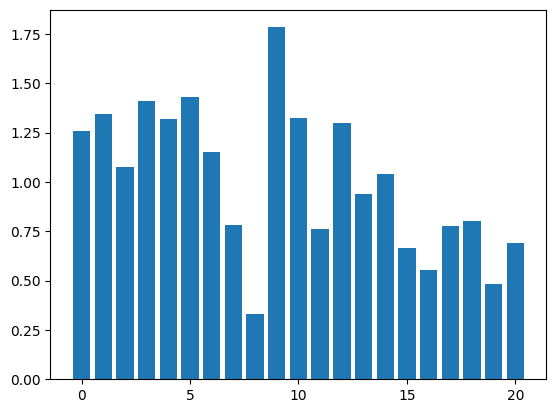

In [ ]:
# ANOVA F-Test : Selecting Categorical Features for Num Targets OR Numerical Features For Categorical Targets
from sklearn.preprocessing import OrdinalEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
fs = SelectKBest(score_func=f_classif, k='all')
fs.fit(X_num, y)
X_num_fs = fs.transform(X_num)
X1_num_fs = fs.transform(X1_num)
for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()

In [ ]:
#X_num_fs = X_num[['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO','O3','Benzene', 'Toluene','hour_Cos','year','day','dayofweek']]
#X1_num_fs = X1_num[['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO','O3','Benzene', 'Toluene','hour_Cos','year','day','dayofweek']]

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectKBest was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectKBest was fitted without feature names
  warnings.warn(


(495512, 4) (212363, 4)
Feature 0: 42.168707
Feature 1: 0.534944
Feature 2: 5.966973
Feature 3: nan
Feature 4: nan
Feature 5: nan
Feature 6: nan
Feature 7: 4.957103
Feature 8: nan
Feature 9: 4.385292
Feature 10: nan


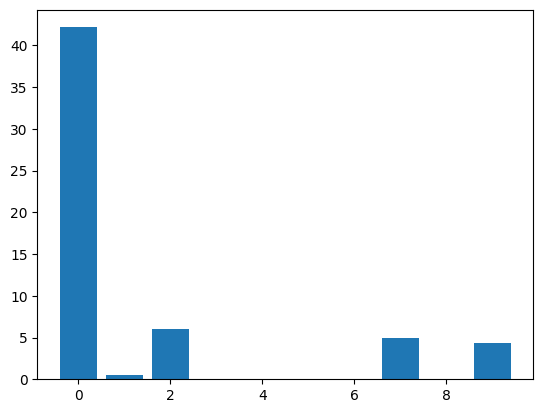

In [ ]:
# Chi Squared feature selection : Selecting Categorical(Nominal) Features for Categorical targets
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()
# convert features to string
oe.fit(pd.concat([X_nom,X1_nom],axis=0))
X_nom_oe = oe.transform(X_nom)
X1_nom_oe = oe.transform(X1_nom)
# feature selection
fs_nom = SelectKBest(score_func=chi2, k=4)
fs_nom.fit(X_nom_oe, y)
X_nom_fs = fs_nom.transform(X_nom)
X1_nom_fs = fs_nom.transform(X1_nom)
print(X_nom_fs.shape,X1_nom_fs.shape)
# what are scores for the features
for i in range(len(fs_nom.scores_)):
    print('Feature %d: %f' % (i, fs_nom.scores_[i]))
# plot the scores
plt.bar([i for i in range(len(fs_nom.scores_))], fs_nom.scores_)
plt.show()


In [ ]:
from sklearn.preprocessing import OneHotEncoder
oh1 = OneHotEncoder(sparse=False,drop='first')
oh1.fit(np.concatenate([X_nom_fs,X1_nom_fs],axis=0))
X_nom_ohe = oh1.transform(X_nom_fs)
X1_nom_ohe = oh1.transform(X1_nom_fs)
print(X_nom_ohe.shape, X1_nom_ohe.shape)

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


(495512, 31) (212363, 31)


In [ ]:
X_final = np.concatenate([X_num_fs,X_nom_ohe],axis=1)
X1_final = np.concatenate([X1_num_fs,X1_nom_ohe],axis=1)
print(X_final.shape, X1_final.shape)

(495512, 52) (212363, 52)


In [ ]:
# Train Val Test Split
val_split = int(0.80*(X_final.shape[0]))
X_train = X_final[:val_split]
y_train = y[:val_split]
X_val = X_final[val_split:]
y_val = y[val_split:]
print(X_train.shape,X_val.shape,y_train.shape,y_val.shape)

(396409, 52) (99103, 52) (396409,) (99103,)


In [ ]:
"""max = X_train.max(axis=0)
min = X_train.min(axis=0)
X_train_norm = (X_train-min)/(max-min)
X_val_norm = (X_val-min)/(max-min)
print(X_train_norm.shape,X_val_norm.shape)"""

'max = X_train.max(axis=0)\nmin = X_train.min(axis=0)\nX_train_norm = (X_train-min)/(max-min)\nX_val_norm = (X_val-min)/(max-min)\nprint(X_train_norm.shape,X_val_norm.shape)'

In [ ]:
past=6
future=1

In [ ]:
# Prepare 
X_train_prep = []
y_train_prep = []
for i in range(past,(X_train.shape[0]-future+1)):
    X_train_prep.append(X_train[i-past:i+1])
    y_train_prep.append(y_train[i:i+future])
X_train_prep = np.array(X_train_prep)
y_train_prep = np.array(y_train_prep).flatten()
print(X_train_prep.shape, y_train_prep.shape)

(396403, 7, 52) (396403,)


In [ ]:
# Prepare 
X_val_prep = []
y_val_prep = []
for i in range(past,(X_val.shape[0]-future+1)):
    X_val_prep.append(X_val[i-past:i+1])
    y_val_prep.append(y_val[i:i+future])
X_val_prep = np.array(X_val_prep)
y_val_prep = np.array(y_val_prep).flatten()
#y_prep = y_prep.reshape(y_prep.shape[0], y_prep.shape[2])
print(X_val_prep.shape, y_val_prep.shape)

(99097, 7, 52) (99097,)


In [ ]:
!pip install autokeras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Neural Network : Structured Data (Forward Walk)
import autokeras as ak
input_layer = ak.Input()
conv_layer = ak.ConvBlock()(input_layer)
rnn_layer = ak.RNNBlock()(conv_layer)
output_layer = ak.RegressionHead()(rnn_layer)
model = ak.AutoModel(inputs=input_layer, outputs=output_layer, overwrite=True,max_trials=1,metrics=['msle'])

In [ ]:
# Train : Neural Network
model.fit(X_train_prep,y_train_prep, validation_data = (X_val_prep, y_val_prep))
model = model.export_model()
model.summary()


Search: Running Trial #1

Value             |Best Value So Far |Hyperparameter
3                 |3                 |conv_block_1/kernel_size
False             |False             |conv_block_1/separable
True              |True              |conv_block_1/max_pooling
2                 |2                 |conv_block_1/num_blocks
2                 |2                 |conv_block_1/num_layers
256               |256               |conv_block_1/filters_0_0
32                |32                |conv_block_1/filters_0_1
0                 |0                 |conv_block_1/dropout
32                |32                |conv_block_1/filters_1_0
32                |32                |conv_block_1/filters_1_1
True              |True              |rnn_block_1/bidirectional
lstm              |lstm              |rnn_block_1/layer_type
2                 |2                 |rnn_block_1/num_layers
0                 |0                 |regression_head_1/dropout
adam              |adam              |optimizer


In [ ]:
from sklearn.preprocessing import MinMaxScaler
s = MinMaxScaler()
X_norm = s.fit_transform(X_prep)
X1_norm =  s.transform(X1_prep)

In [ ]:
!pip install autokeras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import autokeras as ak
input1 = ak.Input()
ouput = ak.DenseBlock()(input1)
output = ak.RegressionHead()(ouput)
model = ak.AutoModel(inputs=input1,outputs=output,overwrite=True,max_trials=1,metrics=['msle'])

In [ ]:
model.fit(X_norm,y,epochs=3)

In [ ]:
y_pred = model.predict(X1_prep)

In [ ]:
!pip install flaml

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.4/250.4 kB 11.5 MB/s eta 0:00:00


In [ ]:
# Auto ML : Fast and Light Auto ML FLAML (Microsoft)
from flaml import AutoML
model_ML = AutoML()
model_ML.fit( X_prep, y,
    time_budget= 600,  # in seconds
    metric = 'rmse',
    task = 'regression',
    eval_method='cv',
             n_splits=10,# cross validation
    #estimator_list=['lgbm'],         
    ensemble=False) # ensemble all models
model = model_ML.model

[flaml.automl.logger: 04-16 12:53:55] {1768} INFO - task = regression
[flaml.automl.logger: 04-16 12:53:55] {1775} INFO - Data split method: uniform
[flaml.automl.logger: 04-16 12:53:55] {1778} INFO - Evaluation method: cv
[flaml.automl.logger: 04-16 12:53:55] {1891} INFO - Minimizing error metric: rmse
[flaml.automl.logger: 04-16 12:53:55] {2011} INFO - List of ML learners in AutoML Run: ['lgbm', 'rf', 'xgboost', 'extra_tree', 'xgb_limitdepth']
[flaml.automl.logger: 04-16 12:53:55] {2341} INFO - iteration 0, current learner lgbm
[flaml.automl.logger: 04-16 12:54:10] {2479} INFO - Estimated sufficient time budget=146045s. Estimated necessary time budget=1030s.
[flaml.automl.logger: 04-16 12:54:10] {2526} INFO -  at 14.9s,	estimator lgbm's best error=1.9997,	best estimator lgbm's best error=1.9997
[flaml.automl.logger: 04-16 12:54:10] {2341} INFO - iteration 1, current learner lgbm
[flaml.automl.logger: 04-16 12:54:19] {2526} INFO -  at 24.5s,	estimator lgbm's best error=1.9997,	best es

In [ ]:
"""y = df.AQI_Bucket.to_numpy()
X = df.drop(['AQI_Bucket'],axis=1)
X1=df1"""

In [ ]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse=False)
ohe.fit(DF.City.to_numpy().reshape(-1,1))
DF_city_ohe = ohe.transform(DF.City.to_numpy().reshape(-1,1))
print(DF_city_ohe.shape)

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


(707875, 26)


In [ ]:
DF_concat = pd.concat([DF.reset_index(),pd.DataFrame(DF_city_ohe)],axis=1)
DF_concat = DF_concat.drop(['level_0'],axis=1)
DF_concat.shape

(707875, 48)

In [ ]:
DF = DF.reset_index()

In [ ]:
DF_hour = pd.DataFrame(DF.hour)
DF_hour.columns = ['hour1']

In [ ]:
DF_concat = pd.concat([DF_concat,DF_hour],axis=1)
DF_concat.shape

(707875, 49)

In [ ]:
DF_train

,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,...,17,18,19,20,21,22,23,24,25,hour1
0,Delhi,454.6,935.2,81.5,41.8,187.7,27.5,9.3,3.4,54.9,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,Delhi,409.1,119.1,132.5,41.2,141.0,28.9,29.7,2.8,19.3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
3,Delhi,436.1,119.1,84.8,39.6,102.8,29.3,21.8,2.8,20.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
4,Delhi,415.9,977.0,60.2,37.4,80.1,30.8,26.2,6.2,16.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
5,Delhi,384.2,862.2,59.8,32.1,78.3,30.7,11.0,7.3,12.3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
707869,Ernakulam,9.1,34.2,5.1,2.2,3.2,4.6,2.9,2.7,34.8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19
707870,Ernakulam,12.0,39.1,3.5,2.4,2.2,2.6,2.7,2.7,34.8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20
707871,Ernakulam,13.1,43.4,2.8,2.4,1.7,1.6,2.8,2.7,34.8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21
707873,Ernakulam,14.8,46.0,2.6,2.4,1.6,1.5,2.2,2.4,34.8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,23


In [ ]:
DF_train_delhi = DF_train[DF_train.City=='Delhi']

In [ ]:
val_split = np.int64(0.8*(DF_train_delhi.shape[0]))
DF_train_train = DF_train_delhi[:val_split]
DF_train_val =  DF_train_delhi[val_split:]
print(DF_train_train.shape,DF_train_val.shape)

(26984, 47) (6747, 47)


In [ ]:
cities = ['Jaipur', 'Amritsar', 'Amaravati', 'Kochi', 'Ahmedabad',
       'Lucknow', 'Thiruvananthapuram', 'Talcher', 'Guwahati',
       'Chandigarh', 'Visakhapatnam', 'Gurugram', 'Mumbai', 'Bengaluru',
       'Coimbatore', 'Brajrajnagar', 'Hyderabad', 'Chennai', 'Patna',
       'Kolkata', 'Bhopal', 'Jorapokhar', 'Aizawl', 'Shillong',
       'Ernakulam']

In [ ]:
for city in cities:
    df_temp=DF_train[DF_train.City==city]
    val_split = np.int64(0.8*(df_temp.shape[0]))
    DF_train_train = pd.concat([DF_train_train,df_temp[:val_split]],axis=0)
    DF_train_val = pd.concat([DF_train_val,df_temp[val_split:]],axis=0)
print(DF_train_train.shape,DF_train_val.shape)   

(396398, 47) (99114, 47)


In [ ]:
features = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene', 'year', 'month', 'day', 'dayofweek', 'weekend', 'hour', 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10,
 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25]

In [ ]:
mean = DF_train_train.loc[:,features].mean()
std = DF_train_train.loc[:,features].std()
DF_train_train.loc[:,features] = (DF_train_train.loc[:,features]-mean)/std
DF_train_val.loc[:,features] = (DF_train_val.loc[:,features]-mean)/std

In [ ]:
past=1
future=0

In [ ]:
from tqdm import tqdm
X_train_prep =[]
y_train_prep=[]
for city in tqdm(list(DF.City.unique())):
         df_temp = DF_train_train[DF_train_train.City==city]
         for i in range(past,(df_temp.shape[0]-future)):
              if ((df_temp.iloc[i]['hour1']-df_temp.iloc[i-1]['hour1'])==1)|((df_temp.iloc[i]['hour1']-df_temp.iloc[i-1]['hour1'])==-23):
                      X_train_prep.append(df_temp[i-past:i+1].drop(['AQI_Bucket','City','hour1'],axis=1))
                      y_train_prep.append(df_temp[i:i+1]['AQI_Bucket'])
X_train_prep = np.array(X_train_prep)
y_train_prep = np.array(y_train_prep).flatten()
print(X_train_prep.shape, y_train_prep.shape)                      

100%|██████████| 26/26 [05:20<00:00, 12.32s/it]


(277627, 2, 44) (277627,)


In [ ]:
from tqdm import tqdm
X_val_prep =[]
y_val_prep=[]
for city in tqdm(list(DF.City.unique())):
         df_temp = DF_train_val[DF_train_val.City==city]
         for i in range(past,(df_temp.shape[0]-future)):
              if ((df_temp.iloc[i]['hour1']-df_temp.iloc[i-1]['hour1'])==1)|((df_temp.iloc[i]['hour1']-df_temp.iloc[i-1]['hour1'])==-23):
                      X_val_prep.append(df_temp[i-past:i+1].drop(['AQI_Bucket','City','hour1'],axis=1))
                      y_val_prep.append(df_temp[i:i+1]['AQI_Bucket'])
X_val_prep = np.array(X_val_prep)
y_val_prep = np.array(y_val_prep).flatten()
print(X_val_prep.shape, y_val_prep.shape)  

100%|██████████| 26/26 [01:20<00:00,  3.08s/it]


(69548, 2, 44) (69548,)


In [ ]:
!pip install autokeras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 148.6/148.6 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.1/176.1 kB 15.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 466.8/466.8 kB 20.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 61.5 MB/s eta 0:00:00


In [ ]:
import autokeras as ak
input1 = ak.Input()
#conv = ak.ConvBlock()(input1)
rnn = ak.RNNBlock()(input1)
output = ak.RegressionHead()(rnn)
model = ak.AutoModel(inputs=input1,outputs=output,overwrite=True,max_trials=3,metrics=['msle'])

In [ ]:
model.fit(X_train_prep,y_train_prep,validation_data=(X_val_prep,y_val_prep))

Trial 3 Complete [00h 36m 48s]
val_loss: 3.991079568862915

Best val_loss So Far: 3.990638256072998
Total elapsed time: 01h 11m 08s


In [ ]:
best_model = model.export_model()
best_model.save('/content/drive/MyDrive/machine_hack/aqi/model.h5')

In [ ]:
from tensorflow.keras.models import load_model
model = load_model('/content/drive/MyDrive/machine_hack/aqi/model.h5',custom_objects=ak.CUSTOM_OBJECTS)

PREPARE TEST

In [ ]:
DF_concat_test = DF_concat[DF_concat.train==0]
DF_concat_test.shape

(212363, 49)

In [ ]:
DF_concat_test.index[0]

1

In [ ]:
DF_concat[DF_concat.index==0]

,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,...,17,18,19,20,21,22,23,24,25,hour1
0,Delhi,454.6,935.2,81.5,41.8,187.7,27.5,9.3,3.4,54.9,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [ ]:

for i in range (DF_concat_test.shape[0]):

      